### Basic Animation: Moving Sine Wave

Let's use FuncAnimation to create a basic animation of a sine wave moving across the screen. The source code for the animation has been taken from the [Matplotlib Animation tutorial](http://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/). Let's first see the output and then we shall break down the code to understand what's going under the hood.

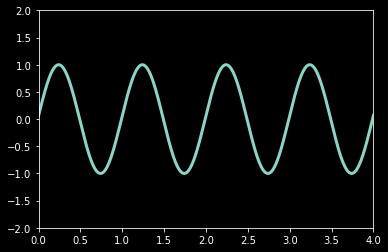

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('dark_background')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


anim.save('Wave.gif', writer='imagemagick')

# Growing Coil

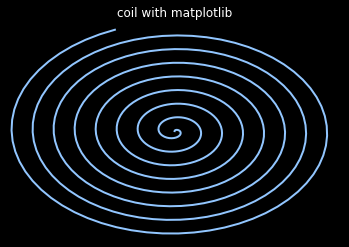

In [13]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
plt.style.use('seaborn-pastel')

fig = plt.figure()
ax = plt.axes(xlim=(-50, 50),ylim=(-50, 50))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

xdata, ydata = [],[]

def animate(i):
    t = 0.1*i
    
    x = t*np.sin(t)
    y = t*np.cos(t)
    
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    return line,

plt.title('coil with matplotlib')
plt.axis('off')

anim2 = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=20, blit=True)

anim2.save('coil.gif',writer='imagemagick')
    
    

# Live update graph

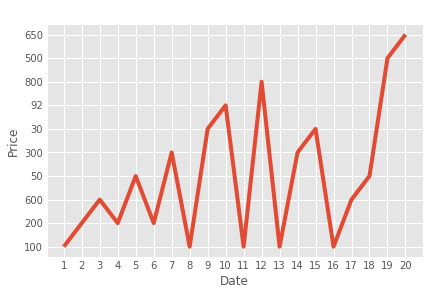

In [31]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use('ggplot')

fig = plt.figure()
axes = fig.add_subplot(1,1,1)

def animate(i):
    graph_data = open('stock.txt','r').read()
    lines = graph_data.split('\n')
    xs = []
    ys = []
    
    for line in lines:
        if len(line) > 1:
            x,y = line.split(',')
            xs.append(x)
            ys.append(y)
    axes.clear()
    axes.plot (xs, ys)
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Live graph with matplotlib')
    
        
anim3 = animation.FuncAnimation(fig, animate, interval=1000)
anim3

# 3D plot animation 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


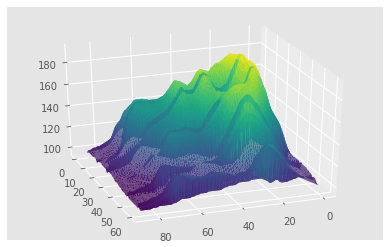

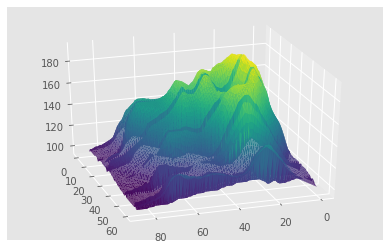

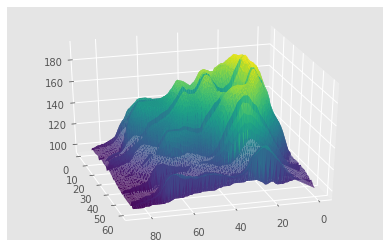

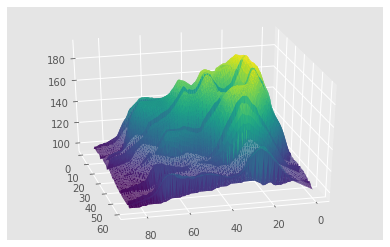

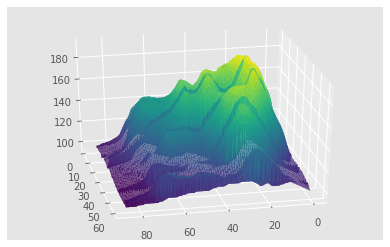

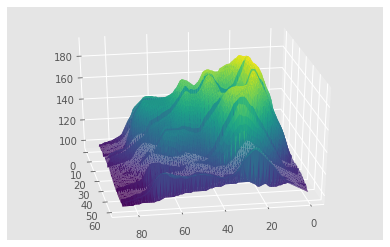

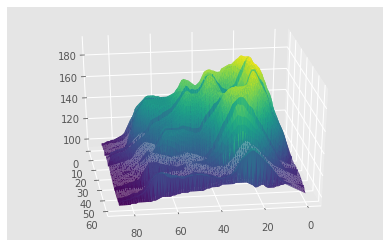

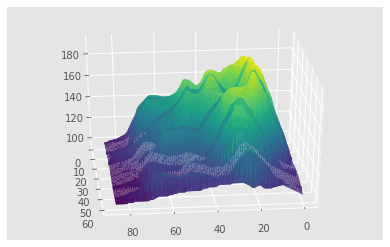

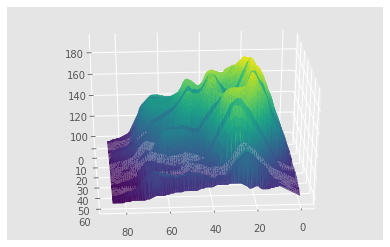

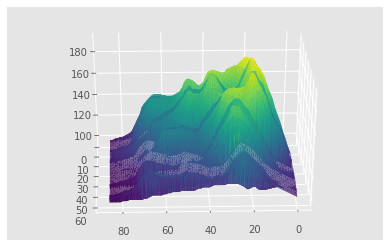

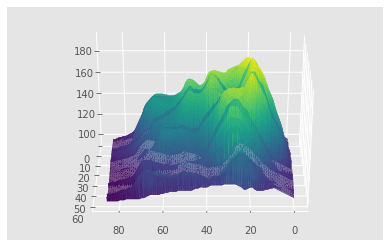

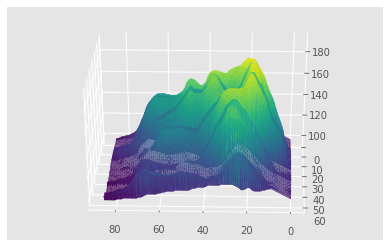

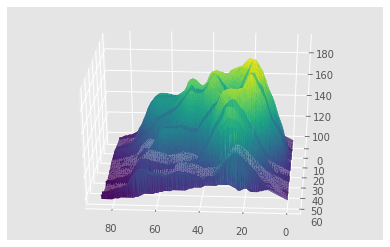

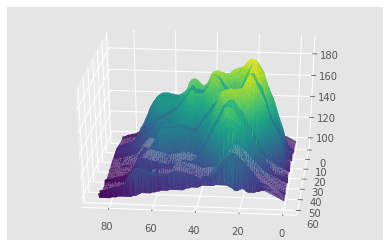

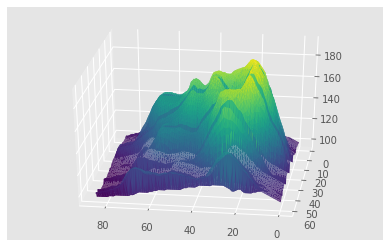

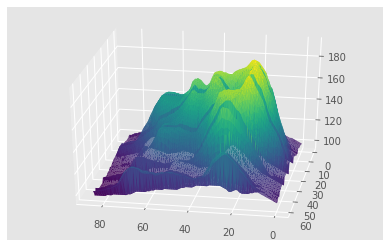

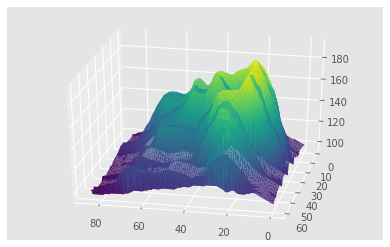

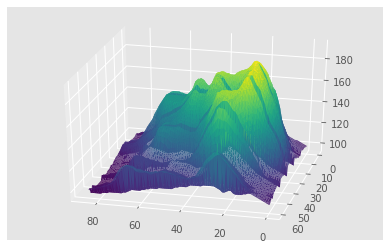

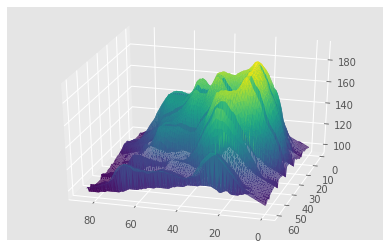

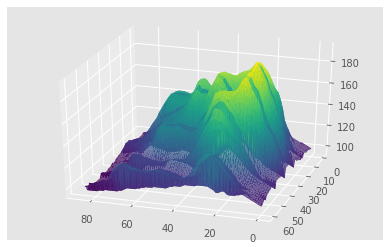

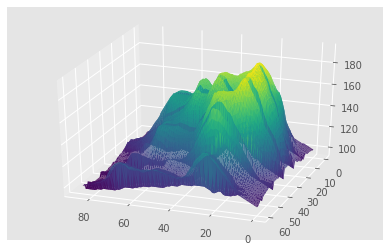

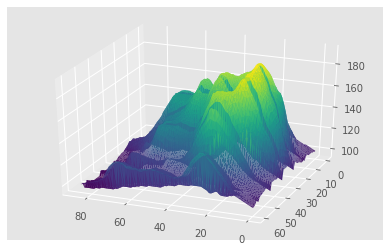

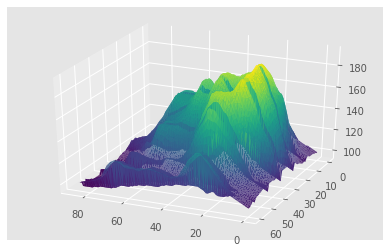

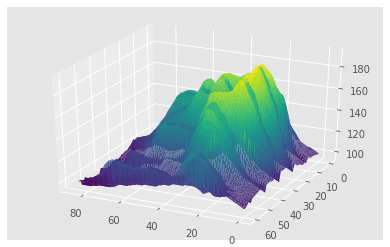

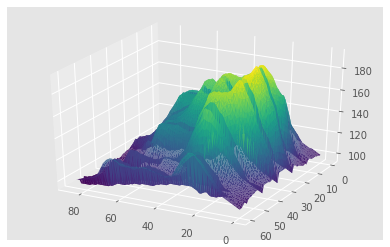

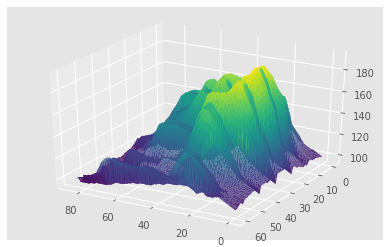

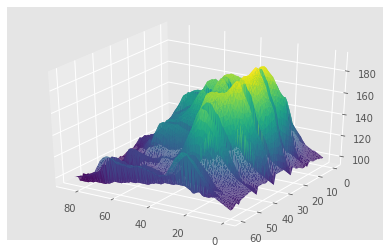

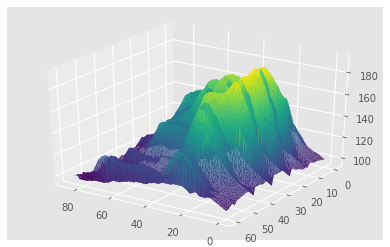

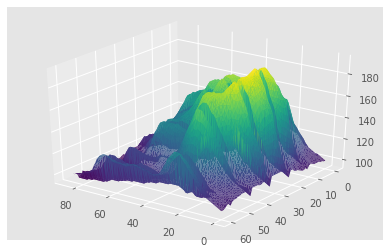

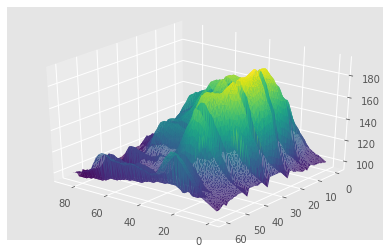

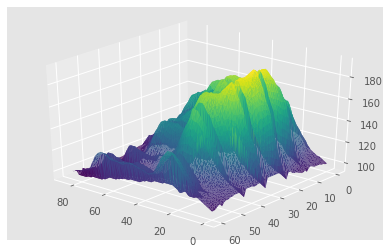

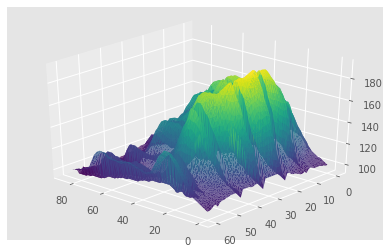

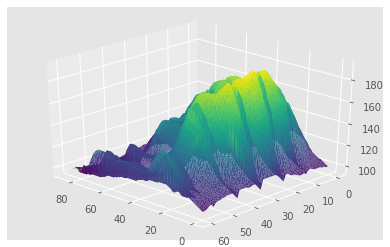

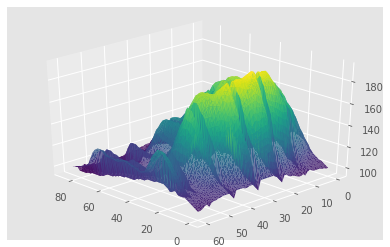

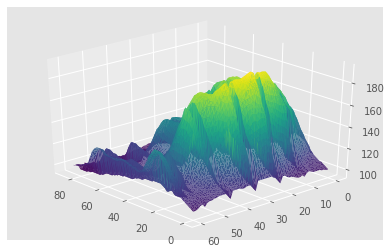

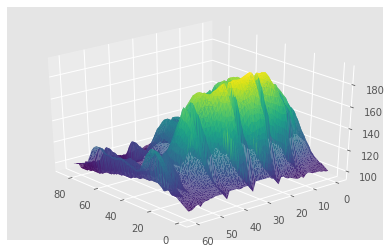

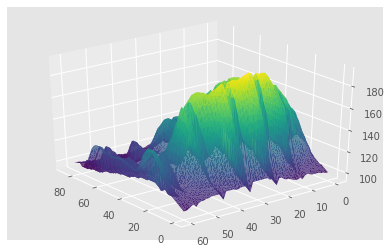

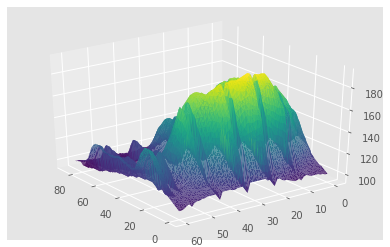

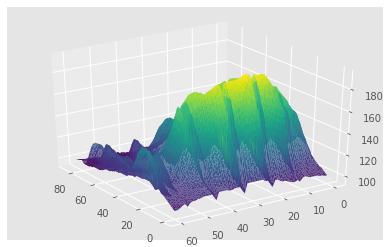

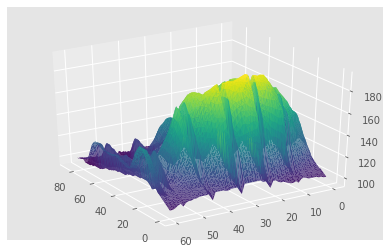

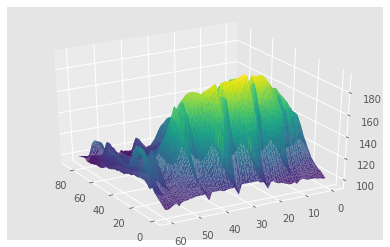

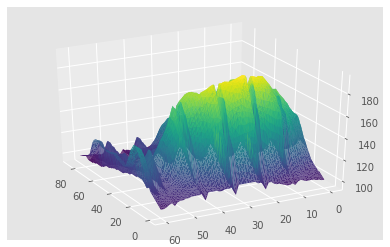

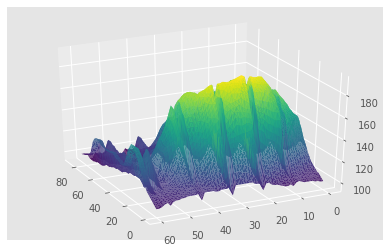

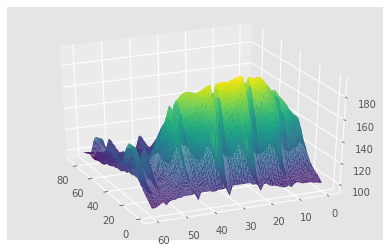

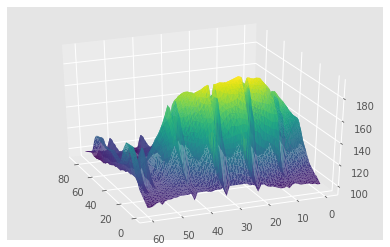

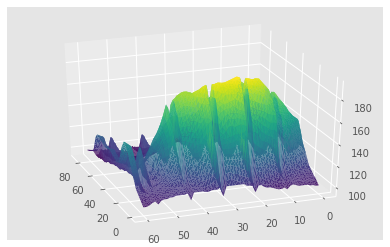

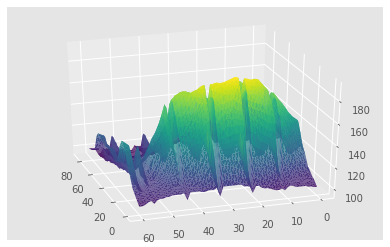

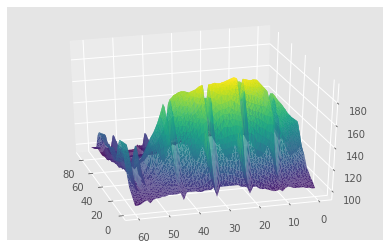

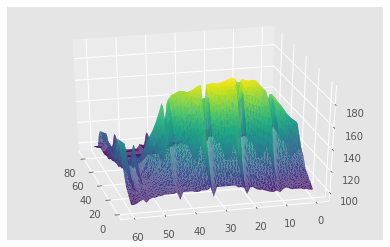

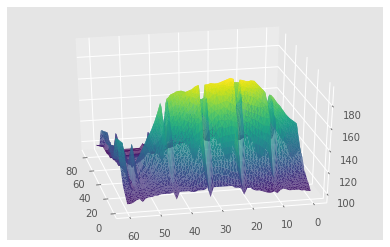

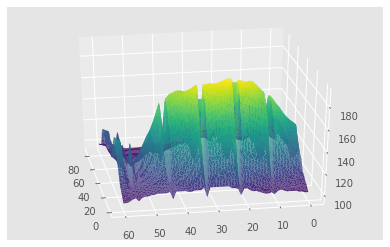

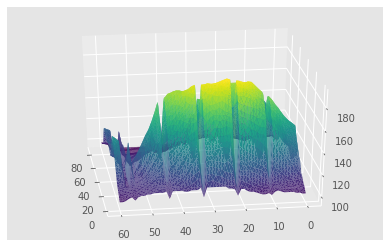

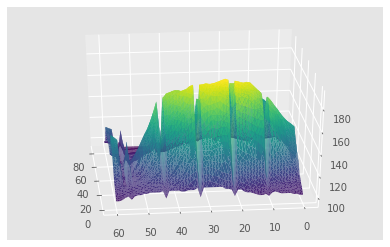

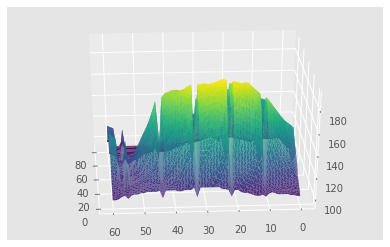

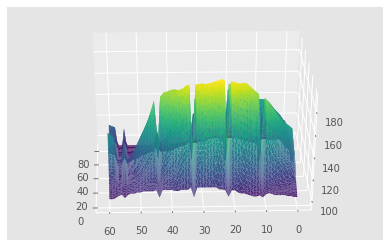

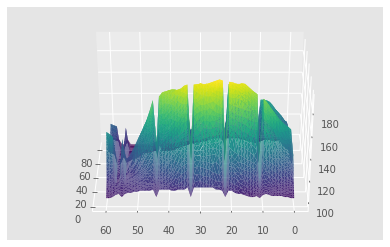

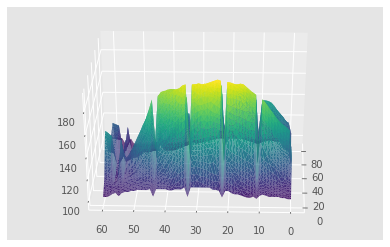

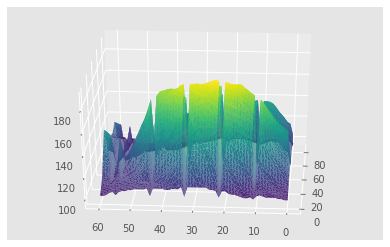

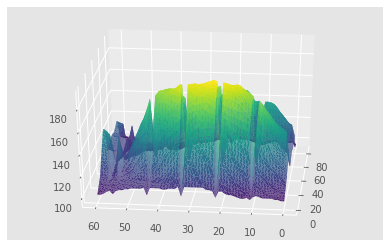

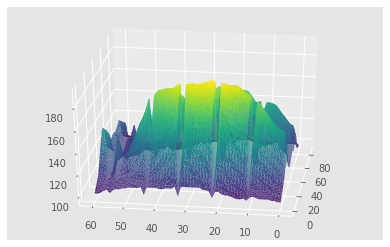

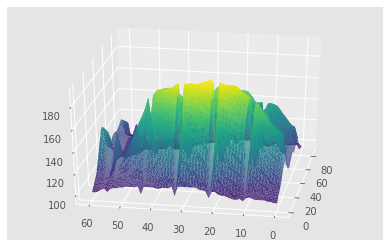

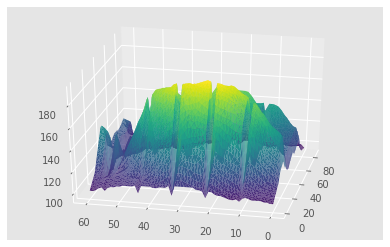

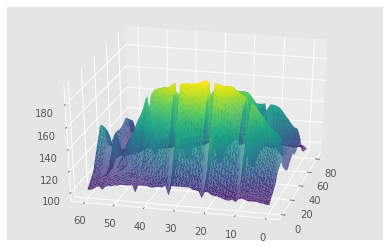

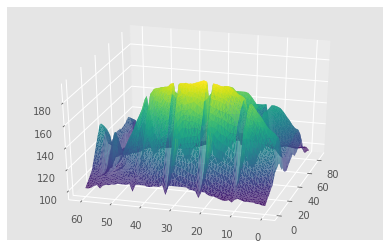

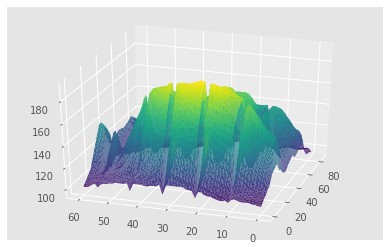

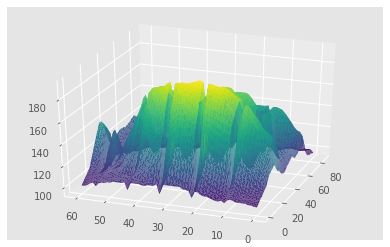

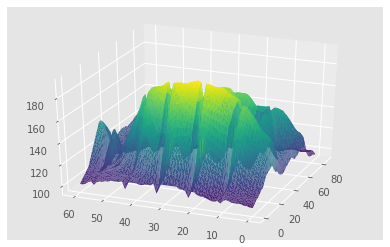

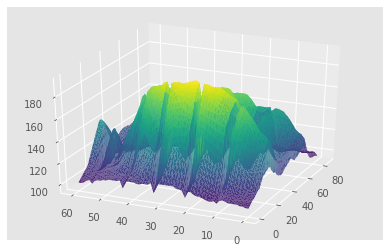

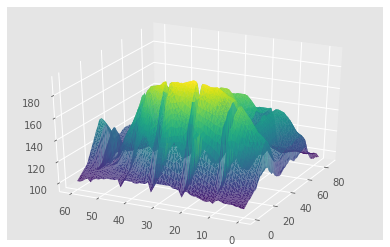

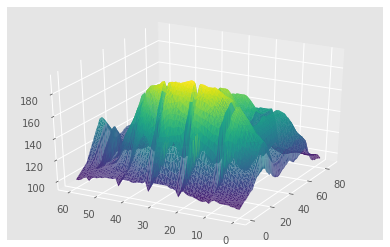

In [34]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/volcano.csv'
data = pd.read_csv(url)

# Transform it to a long format
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]

# And transform the old column name in something numeric
df['X']=pd.Categorical(df['X'])
df['X']=df['X'].cat.codes

# We are going to do 20 plots, for 20 different angles
for angle in range(70,210,2):

# Make the plot
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)

    ax.view_init(30,angle)

    filename='Volcano/Volcano_step'+str(angle)+'.png'
    plt.savefig(filename, dpi=96)
    plt.gca()

# Celluloid module animation

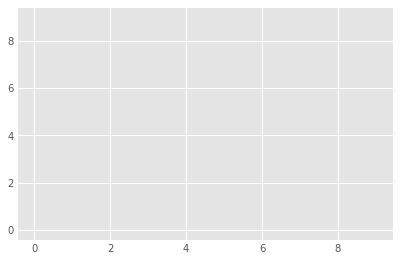

In [38]:
from matplotlib import pyplot as plt
from celluloid import Camera

fig = plt.figure()
camera = Camera(fig)
for i in range(10):
    plt.plot([i] * 10)
    camera.snap()
    
animation = camera.animate()
animation.save('celluloid.gif', writer='imagemagick')

# subplots

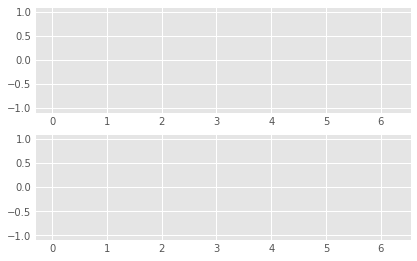

In [41]:
import numpy as np
from matplotlib import pyplot as plt
from celluloid import Camera

fig, axes = plt.subplots(2)
camera = Camera(fig)
t = np.linspace(0, 2 * np.pi, 128, endpoint=False)
for i in t:
    axes[0].plot(t, np.sin(t + i), color='red')
    axes[1].plot(t, np.sin(t - i), color='yellow')
    camera.snap()
    
animation = camera.animate()  
animation.save('celluloid2.gif', writer = 'imagemagick')

# legends

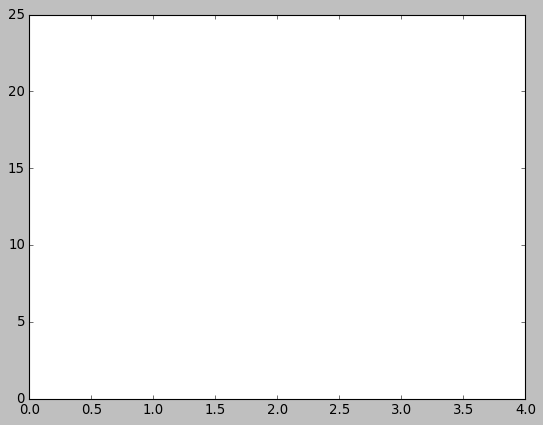

In [43]:
import matplotlib
from matplotlib import pyplot as plt
from celluloid import Camera
plt.style.use('classic')

fig = plt.figure()
camera = Camera(fig)
for i in range(20):
    t = plt.plot(range(i, i+5))
    plt.legend(t, [f'line{i}'])
    camera.snap()
animation = camera.animate()
animation.save('celluloid3.gif',writer = 'imagemagick')

# Magic Triangle

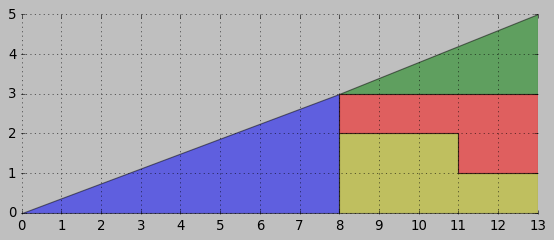

In [51]:
from JSAnimation.IPython_display import display_animation
from matplotlib import animation

# Set up the axes, making sure the axis ratio is equal
fig = plt.figure(figsize=(6.5, 2.5))
ax = fig.add_axes([0, 0, 1, 1], xlim=(-0.02, 13.02), ylim=(-0.02, 5.02),
                  xticks=range(14), yticks=range(6), aspect='equal', frameon=False)
ax.grid(True)

# Define the shapes of the polygons
P1 = np.array([[0, 0], [5, 0], [5, 2], [0, 0]])
P2 = np.array([[0, 0], [8, 0], [8, 3], [0, 0]])
P3 = np.array([[0, 0], [5, 0], [5, 1], [3, 1], [3, 2], [0, 2], [0, 0]])
P4 = np.array([[0, 1], [3, 1], [3, 0], [5, 0], [5, 2], [0, 2], [0, 1]])

# Draw the empty polygons for the animation
kwds = dict(ec='k', alpha=0.5)
patches = [ax.add_patch(plt.Polygon(0 * P1, fc='g', **kwds)),
           ax.add_patch(plt.Polygon(0 * P2, fc='b', **kwds)),
           ax.add_patch(plt.Polygon(0 * P3, fc='y', **kwds)),
           ax.add_patch(plt.Polygon(0 * P4, fc='r', **kwds))]

# This function moves the polygons as a function of the frame i
Nframes = 30
def animate(nframe):
    f = nframe / (Nframes - 1.0)
    patches[0].set_xy(P1 + (8 - 8 * f, 3 - 3 * f + 0.5 * np.sin(f * np.pi)))
    patches[1].set_xy(P2 + (5 * f, 2 * f - 0.5 * np.sin(f * np.pi)))
    patches[2].set_xy(P3 + (8 - 3 * f, 0))
    patches[3].set_xy(P4 + (8, 1 - f))
    return patches
    
anim = animation.FuncAnimation(fig, animate, frames=Nframes, interval=50)
plt.show(anim)

In [49]:
def animate_as_gif(nframe):
    if nframe >= Nframes and nframe < Nframes + 15:
        nframe = Nframes - 1
    elif nframe >= Nframes + 15 and nframe < 2 * Nframes + 15:
        nframe = 2 * Nframes + 14 - nframe
    elif nframe >= 2 * Nframes + 15:
        nframe = 0
    return animate(nframe)
    
anim = animation.FuncAnimation(fig, animate_as_gif,
                               frames=2 * Nframes + 30, interval=50)
anim.save('MagicTriangle.gif', writer='imagemagick')